# 1. Library

In [2]:
install.packages('ISLR')

package 'ISLR' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\admin\AppData\Local\Temp\RtmpwXaaAf\downloaded_packages


In [20]:
install.packages('car')

also installing the dependencies 'Rcpp', 'matrixStats', 'RcppArmadillo', 'zip', 'SparseM', 'MatrixModels', 'conquer', 'sp', 'openxlsx', 'minqa', 'nloptr', 'statmod', 'RcppEigen', 'carData', 'abind', 'pbkrtest', 'quantreg', 'maptools', 'rio', 'lme4'



package 'Rcpp' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'Rcpp'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"C:\Users\admin\Anaconda3\Lib\R\library\00LOCK\Rcpp\libs\x64\Rcpp.dll를 C:\Users\admin\Anaconda3\Lib\R\library\Rcpp\libs\x64\Rcpp.dll로 복사하는데 문제가 발생했습니다: Permission denied"Warning message:
"restored 'Rcpp'"

package 'matrixStats' successfully unpacked and MD5 sums checked
package 'RcppArmadillo' successfully unpacked and MD5 sums checked
package 'zip' successfully unpacked and MD5 sums checked
package 'SparseM' successfully unpacked and MD5 sums checked
package 'MatrixModels' successfully unpacked and MD5 sums checked
package 'conquer' successfully unpacked and MD5 sums checked
package 'sp' successfully unpacked and MD5 sums checked
package 'openxlsx' successfully unpacked and MD5 sums checked
package 'minqa' successfully unpacked and MD5 sums checked
package 'nloptr' successfully unpacked and MD5 sums checked
package 'statmod' successfully unpacked and MD5 sums checked
package 'RcppEigen' successfully unpacked and MD5 sums checked
package 'carData' successfully unpacked and MD5 sums checked
package 'abind' successfully unpacked and MD5 sums checked
package 'pbkrtest' successfully unpacked and MD5 sums checked
package 'quantreg' successfully unpacked and MD5 sums checked
package 'maptools'

In [3]:
library(MASS)
library(ISLR)

Warning message:
"package 'ISLR' was built under R version 3.6.3"

# 2. Simple Linear Regression

## 2-1

In [4]:
fix(Boston)
names(Boston)

[1] "crim"    "zn"      "indus"   "chas"    "nox"     "rm"      "age"    
 [8] "dis"     "rad"     "tax"     "ptratio" "black"   "lstat"   "medv"

## 2-2

In [6]:
lm.fit = lm(medv~lstat, data = Boston)
lm.fit
summary(lm.fit)


Call:
lm(formula = medv ~ lstat, data = Boston)

Coefficients:
(Intercept)        lstat  
      34.55        -0.95  



Call:
lm(formula = medv ~ lstat, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.168  -3.990  -1.318   2.034  24.500 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 34.55384    0.56263   61.41   <2e-16 ***
lstat       -0.95005    0.03873  -24.53   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.216 on 504 degrees of freedom
Multiple R-squared:  0.5441,	Adjusted R-squared:  0.5432 
F-statistic: 601.6 on 1 and 504 DF,  p-value: < 2.2e-16


## 2-3

In [8]:
predict(lm.fit, data.frame(lstat=(c(5,10,15))), interval='confidence')
predict(lm.fit, data.frame(lstat=(c(5,10,15))), interval='prediction')

fit,lwr,upr
29.80359,29.00741,30.59978
25.05335,24.47413,25.63256
20.30310,19.73159,20.87461


fit,lwr,upr
29.80359,17.565675,42.04151
25.05335,12.827626,37.27907
20.30310,8.077742,32.52846


## 2-4

The following objects are masked from Boston (pos = 3):

    age, black, chas, crim, dis, indus, lstat, medv, nox, ptratio, rad,
    rm, tax, zn

The following objects are masked from Boston (pos = 4):

    age, black, chas, crim, dis, indus, lstat, medv, nox, ptratio, rad,
    rm, tax, zn



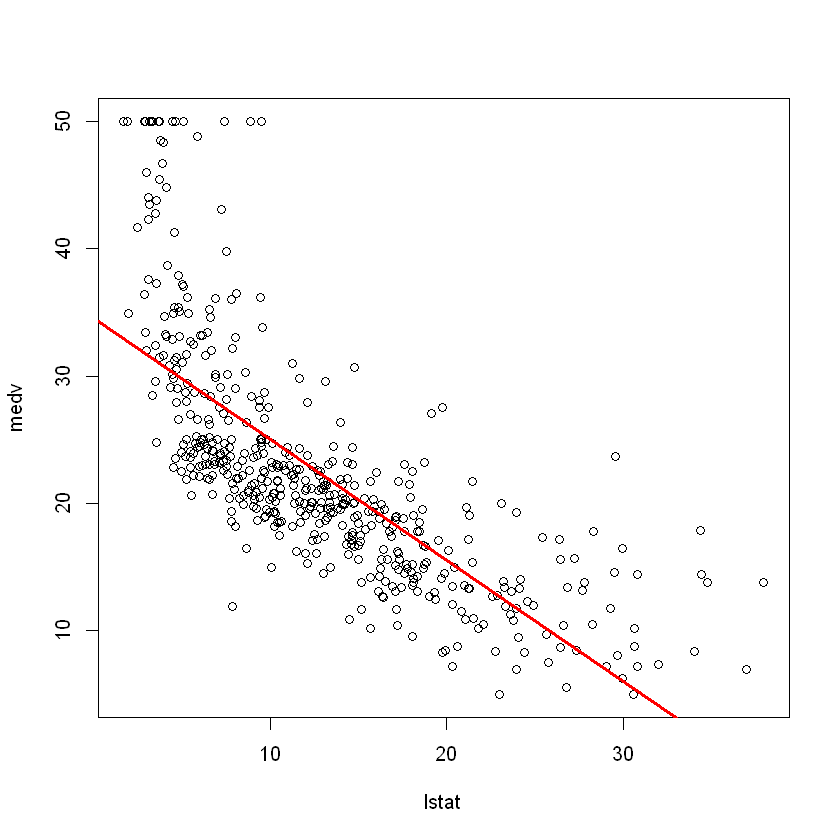

In [12]:
attach(Boston)
plot(lstat, medv)
abline (lm.fit ,lwd =3, col ="red ")


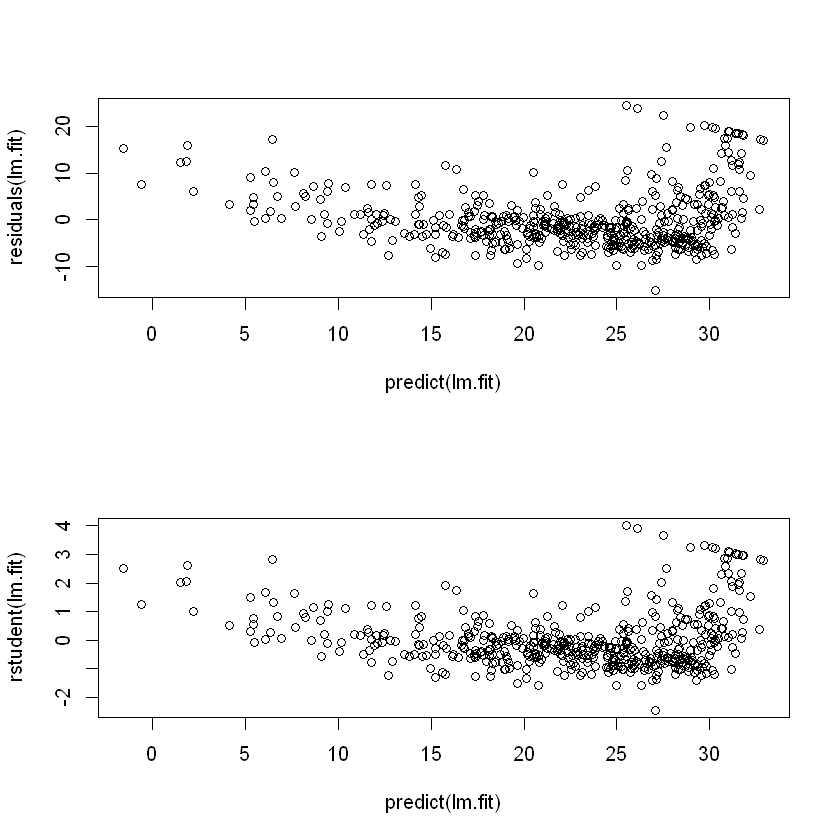

In [16]:
par(mfrow=c(2,1))
plot(predict(lm.fit), residuals(lm.fit))
plot(predict(lm.fit), rstudent(lm.fit))

# 3. Multiple Linear Regression

## 3-1

In [18]:
lm.fit=lm(medv~lstat+age, data=Boston)
summary(lm.fit)


Call:
lm(formula = medv ~ lstat + age, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.981  -3.978  -1.283   1.968  23.158 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 33.22276    0.73085  45.458  < 2e-16 ***
lstat       -1.03207    0.04819 -21.416  < 2e-16 ***
age          0.03454    0.01223   2.826  0.00491 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.173 on 503 degrees of freedom
Multiple R-squared:  0.5513,	Adjusted R-squared:  0.5495 
F-statistic:   309 on 2 and 503 DF,  p-value: < 2.2e-16


In [23]:
library(car)
lm.fit2=lm(medv~.,data=Boston)
vif(lm.fit2)

crim       zn    indus     chas      nox       rm      age      dis 
1.792192 2.298758 3.991596 1.073995 4.393720 1.933744 3.100826 3.955945 
     rad      tax  ptratio    black    lstat 
7.484496 9.008554 1.799084 1.348521 2.941491

# 4. Interaction Terms

In [25]:
summary(lm(medv~lstat*age, data=Boston))


Call:
lm(formula = medv ~ lstat * age, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.806  -4.045  -1.333   2.085  27.552 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 36.0885359  1.4698355  24.553  < 2e-16 ***
lstat       -1.3921168  0.1674555  -8.313 8.78e-16 ***
age         -0.0007209  0.0198792  -0.036   0.9711    
lstat:age    0.0041560  0.0018518   2.244   0.0252 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.149 on 502 degrees of freedom
Multiple R-squared:  0.5557,	Adjusted R-squared:  0.5531 
F-statistic: 209.3 on 3 and 502 DF,  p-value: < 2.2e-16


# 5. Non-linear Transformations

In [26]:
lm.fit3=lm(medv~lstat+I(lstat^2))
summary(lm.fit3)


Call:
lm(formula = medv ~ lstat + I(lstat^2))

Residuals:
     Min       1Q   Median       3Q      Max 
-15.2834  -3.8313  -0.5295   2.3095  25.4148 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 42.862007   0.872084   49.15   <2e-16 ***
lstat       -2.332821   0.123803  -18.84   <2e-16 ***
I(lstat^2)   0.043547   0.003745   11.63   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.524 on 503 degrees of freedom
Multiple R-squared:  0.6407,	Adjusted R-squared:  0.6393 
F-statistic: 448.5 on 2 and 503 DF,  p-value: < 2.2e-16


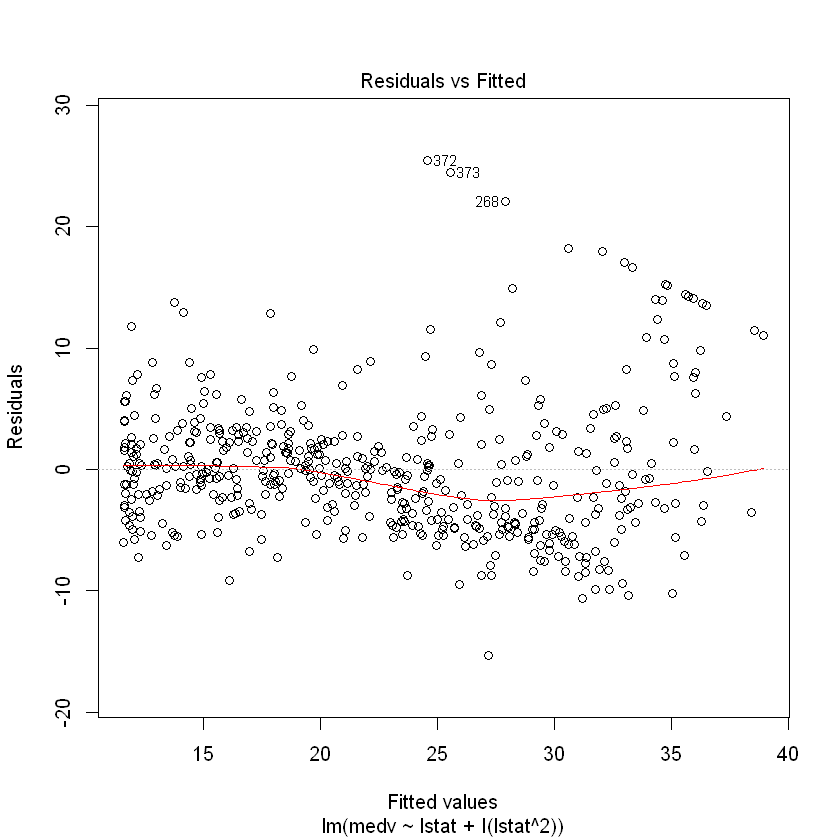

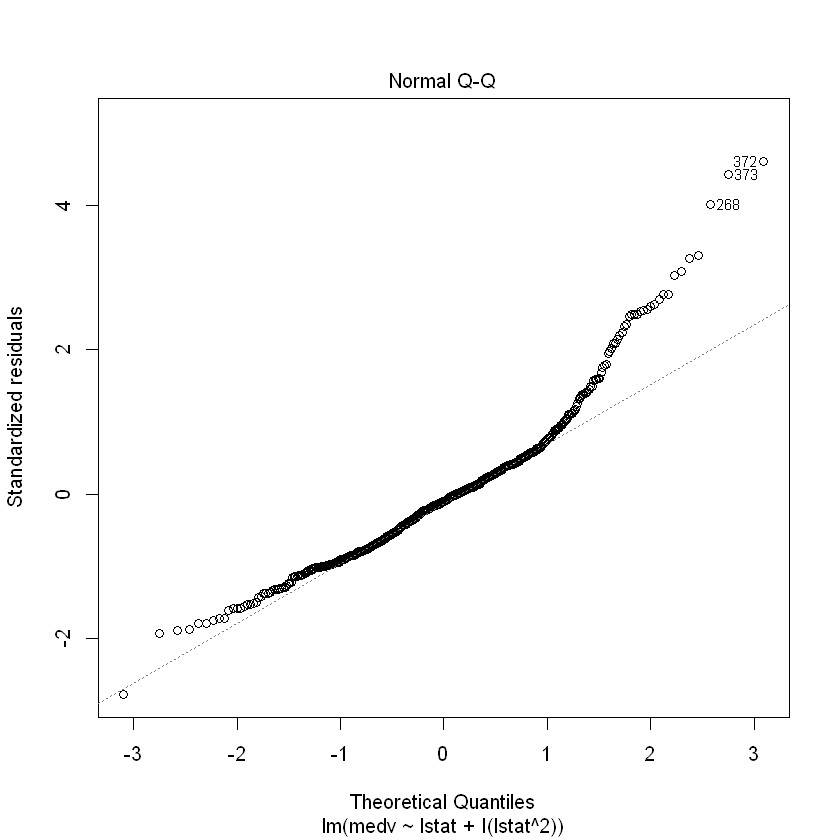

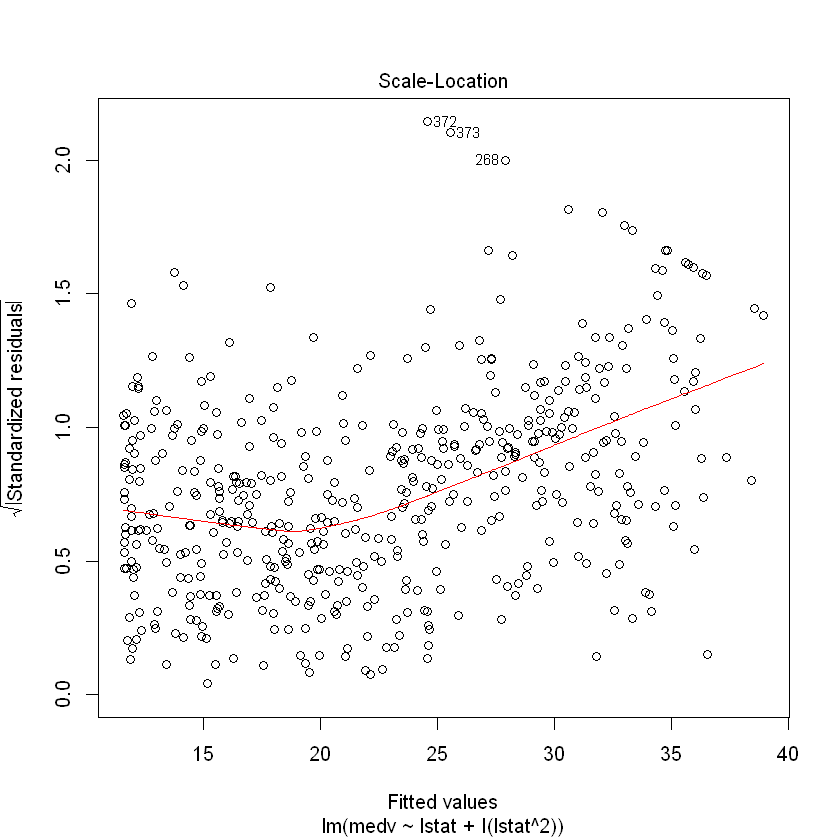

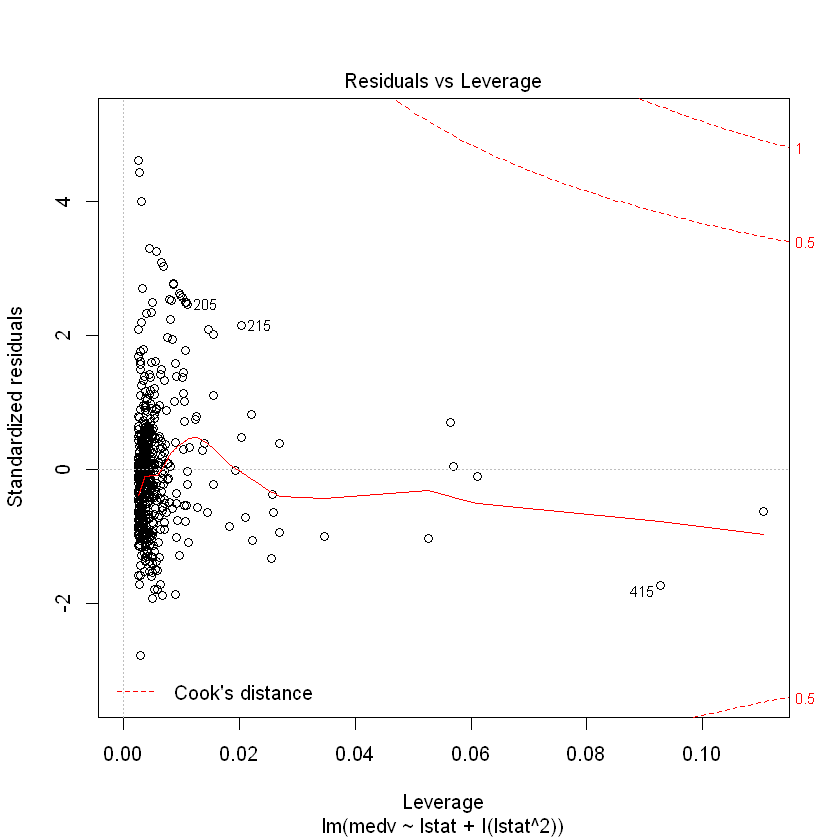

In [27]:
plot(lm.fit3)

# 6. Qualitative Predictors

## 6-1

In [28]:
lm.fit=lm(Sales~., data=Carseats)
summary(lm.fit)


Call:
lm(formula = Sales ~ ., data = Carseats)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.8692 -0.6908  0.0211  0.6636  3.4115 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      5.6606231  0.6034487   9.380  < 2e-16 ***
CompPrice        0.0928153  0.0041477  22.378  < 2e-16 ***
Income           0.0158028  0.0018451   8.565 2.58e-16 ***
Advertising      0.1230951  0.0111237  11.066  < 2e-16 ***
Population       0.0002079  0.0003705   0.561    0.575    
Price           -0.0953579  0.0026711 -35.700  < 2e-16 ***
ShelveLocGood    4.8501827  0.1531100  31.678  < 2e-16 ***
ShelveLocMedium  1.9567148  0.1261056  15.516  < 2e-16 ***
Age             -0.0460452  0.0031817 -14.472  < 2e-16 ***
Education       -0.0211018  0.0197205  -1.070    0.285    
UrbanYes         0.1228864  0.1129761   1.088    0.277    
USYes           -0.1840928  0.1498423  -1.229    0.220    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual

## 6-2

In [29]:
attach(Carseats)
contrasts(ShelveLoc)

,Good,Medium
Bad,0,0
Good,1,0
Medium,0,1
